### **1. Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.columns = df.columns.str.replace(' ', '_')


In [3]:
#1
df_sorted = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False)
df_sorted.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
61,France,127,151,370,11.8
45,Czech Republic,361,170,134,11.8
141,Russian Federation,247,326,73,11.5
99,Luxembourg,236,133,271,11.4
155,Slovakia,196,293,116,11.4
81,Ireland,313,118,165,11.4


In [4]:
#2
print(df['beer_servings'].mean())
print(df['spirit_servings'].mean())
print(df['wine_servings'].mean())

106.16062176165804
80.99481865284974
49.45077720207254


In [5]:
#3
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3.00
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
0,Afghanistan,0,0,0,0.0,0.000000
1,Albania,89,132,54,4.9,91.666667
2,Algeria,25,0,14,0.7,13.000000
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,145.333333
189,Vietnam,111,2,1,2.0,38.000000
190,Yemen,6,0,0,0.1,2.000000
191,Zambia,32,19,4,2.5,18.333333


In [6]:
#4
indice = df['alcohol_index'].idxmax()
df.loc[indice, 'country']

'Andorra'

In [7]:
#5
df[df['beer_servings'] > 100]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
5,Antigua & Barbuda,102,128,45,4.9,91.666667
6,Argentina,193,25,221,8.3,146.333333
8,Australia,261,72,212,10.4,181.666667
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,180.000000
184,USA,249,158,84,8.7,163.666667
185,Uruguay,115,35,220,6.6,123.333333
188,Venezuela,333,100,3,7.7,145.333333


<BarContainer object of 10 artists>

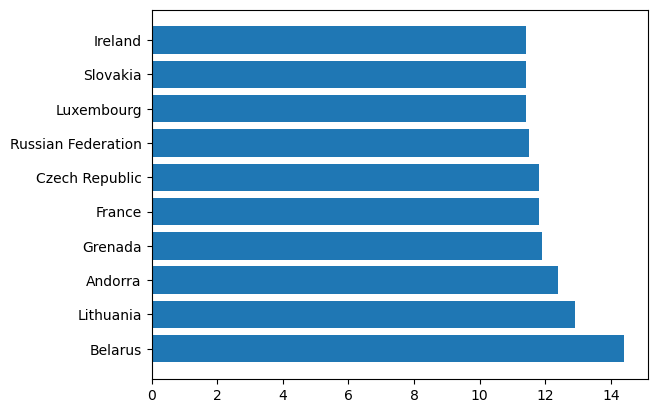

In [8]:
#6
import matplotlib.pyplot as plt

categorie = df_sorted['country'].head(10)
valori = df_sorted['total_litres_of_pure_alcohol'].head(10)

plt.barh(categorie, valori)

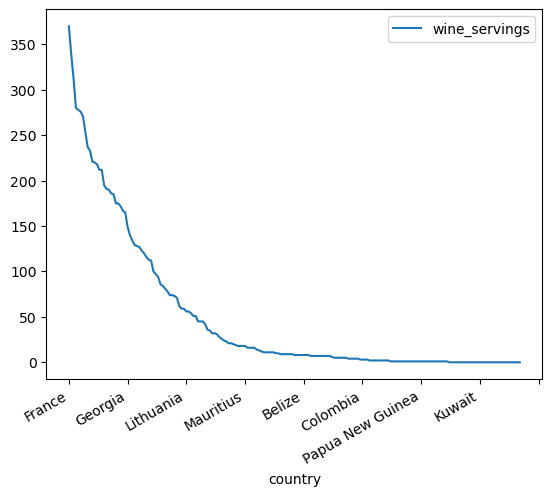

In [12]:
# 7
vino = df.sort_values('wine_servings', ascending=False)
vino.plot(kind = 'line', x='country', y='wine_servings')
plt.xticks(rotation=30, ha='right')
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [83]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [87]:
df.dropna(subset=['salary_year_avg'], inplace=True)
df.groupby('job_country')['salary_year_avg'].mean()

job_country
Albania        79472.500000
Algeria        44550.000000
Argentina     105212.343750
Armenia        78757.000000
Australia     118987.574324
                  ...      
Uruguay        69333.333333
Uzbekistan     30750.000000
Vietnam        90927.236364
Zambia         90670.000000
Zimbabwe       67056.666667
Name: salary_year_avg, Length: 108, dtype: float64

In [86]:
df['job_country'].value_counts()

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Lesotho                3
Mauritania             3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64

In [88]:
df.dropna(subset=['job_title'], inplace=True)
df.groupby('job_country')['job_title'].value_counts()

job_country  job_title                                                  
Albania      Mid Data Scientist (f/m/x), Albania                            2
             Data Analytics Specialist With SQL & Tableau                   1
             Junior Data Quality Specialist with financial background       1
             Senior Data Scientist (f/m/x), Albania                         1
Algeria      Data Operations Specialist                                     1
                                                                           ..
Vietnam      [EMC] AI Engineer                                              1
             [SO] Data Analyst (EN)                                         1
Zambia       Associate Data Scientist                                       1
Zimbabwe     Post-Doctoral Fellow or Associate - Agronomy Data Scientist    2
             Data Analysis and Visualisation Consultant                     1
Name: count, Length: 11653, dtype: int64

In [89]:
df.groupby('job_country')['salary_year_avg'].agg(['min', 'max'])

,min,max
job_country,,
Albania,43200.0,157500.0
Algeria,44100.0,45000.0
Argentina,45000.0,222000.0
Armenia,45000.0,128682.0
Australia,20000.0,257500.0
...,...,...
Uruguay,50000.0,100500.0
Uzbekistan,30750.0,30750.0
Vietnam,28000.0,200000.0


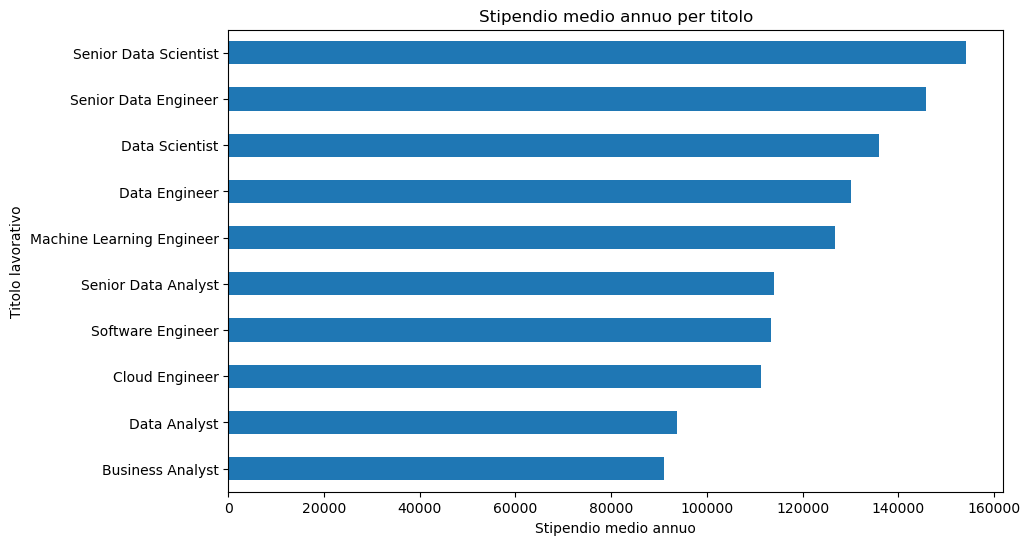

In [90]:
salary_per_title = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
salary_per_title.plot(kind="barh")

plt.gca().invert_yaxis()

plt.title("Stipendio medio annuo per titolo")
plt.xlabel("Stipendio medio annuo")
plt.ylabel("Titolo lavorativo")

plt.show()
